# Свойства оценок

In [34]:
import numpy as np
from scipy.stats import uniform, expon, pareto, cauchy, norm
import scipy.optimize as opt
import math
from matplotlib import pylab as plt
%matplotlib inline

N = 10000

# Task 1

(К теоретической задаче 1)} Сгенерируйте выборку $X_1, ..., X_N$ из равномерного рас\-пределения
на отрезке $[0, \theta]$ для $N = 10^4.$ Для всех $n\leq N$
посчитайте оценки па\-раметра $\theta$ из теоретической задачи:
$2\overline{X},$ $\overline{X} + X_{(n)}/2,$ $(n + 1)X_{(1)},$
$X_{(1)} + X_{(n)},$ $\frac{n+1}{n}X_{(n)}.$ Постройте на одном
графике разными цветами для всех оценок функции модуля раз\-ности
оценки и истинного значения $\theta$ в зависимости от $n.$ Если
некоторые оценки (при фиксированном значении $n$) сильно отличаются
от истинного значения параметра $\theta,$ то исключите их и
постройте еще один график со всеми кривыми (для измененно\-го
значения $\theta$). Для избавления от больших значений разности в
начале ограничьте масштаб графика. Для наглядности точки можно
соединить линиями. Какая оценка получилась лучше (в смысле
упомянутого модуля разности при $n = N$)? Проведите эксперимент для
разных значений $\theta$ (количество графиков равно количеству
значе\-ний $\theta$).

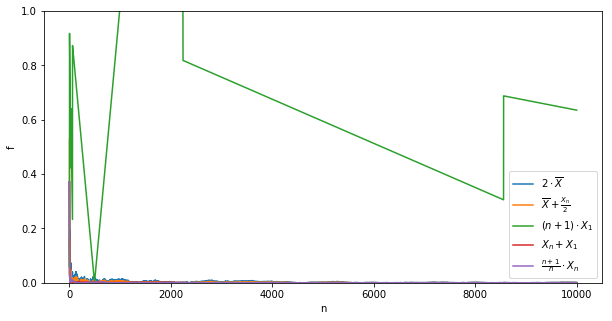

In [37]:
teta = 1
selection = uniform(scale=teta).rvs(size=N) #generate uniform distribution
n = np.linspace(1, N + 1, N) #генерирую диапазон для n
x1 = np.minimum.accumulate(selection) #первая элемент из выборки
xn = np.maximum.accumulate(selection) # последний элемент из выборки
X = np.cumsum(selection) / n #prefix sum for all 0 <= n <= 10000
estimations = [abs(2 * X - teta), abs(X + xn/2 - teta), abs((n + 1) * x1 - teta), abs(xn + x1 - teta), abs((n + 1) * xn / n - teta)] 
plt.figure(figsize=(10,5))
for estimate in estimations: #для каждой оценки строю соответствующий график
    plt.plot(n, estimate)
plt.xlabel('n')
plt.ylabel('f')
plt.legend([r"$2 \cdot \overline{X}$", r"$\overline{X} + \frac{X_n}{2}$", r"$(n + 1) \cdot X_1$", r"$X_n + X_1$", r"$\frac{n + 1}{n} \cdot X_n$"])
plt.ylim([0, 1])
plt.show()


Таким образом, из построенного графика мы видим, что оценка (n + 1) * X_1 выбивается из всех. Значит нам нужно его исключить.

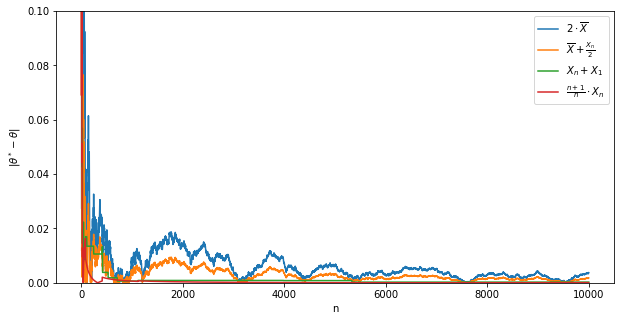

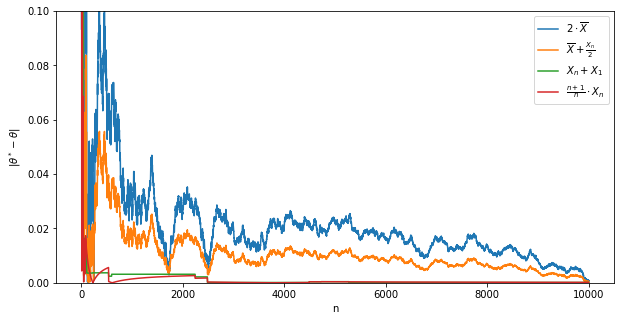

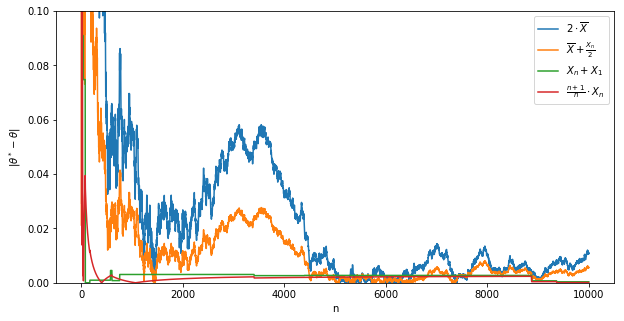

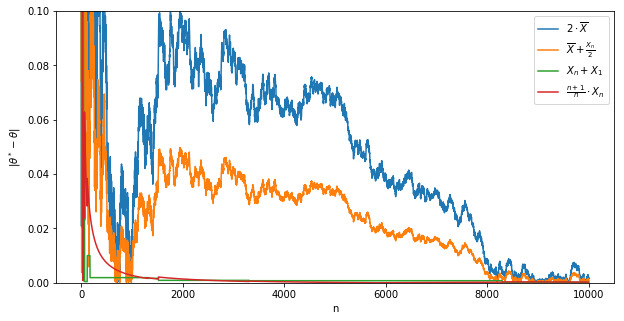

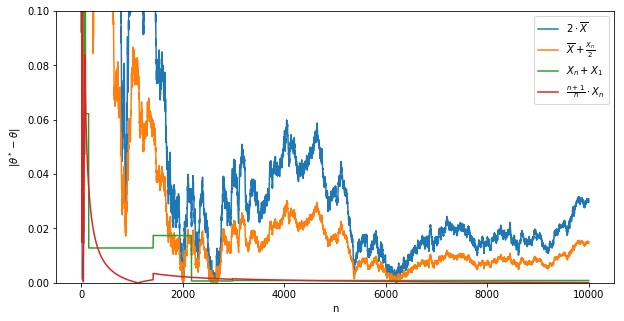

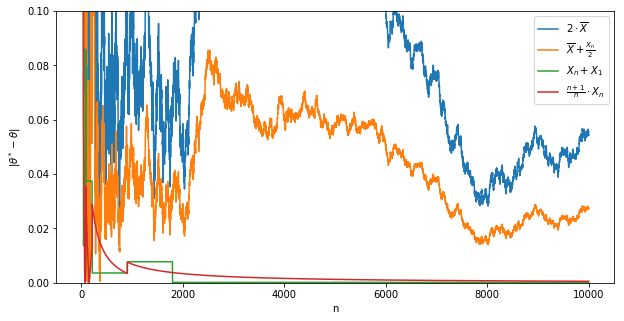

In [38]:
teta = np.linspace(1, 7, 6)
for t in teta:
    selection = uniform(scale=t).rvs(size=N)
    n = np.linspace(1, N + 1, N)
    x1 = np.minimum.accumulate(selection)
    xn = np.maximum.accumulate(selection)
    X = np.cumsum(selection) / n
    estimations = [abs(2 * X - t), abs(X + xn/2 - t), abs(xn + x1 - t),
              abs((n + 1) * xn / n - t)]
    plt.figure(figsize=(10,5))
    for estimate in estimations:
        plt.plot(n, estimate)
    plt.xlabel('n')
    plt.ylabel(r'$|\theta^* - \theta|$')
    plt.legend([r"$2\cdot\overline{X}$", r"$\overline{X} + \frac{X_n}{2}$", r"$X_n + X_1$", r"$\frac{n + 1}{n} \cdot X_n$"])
    plt.ylim([0, 0.1])
    plt.show()

Вывод: видно, что четвертая оценка (n + 1) * X_n / n лучше всех остальных (в смысле упомянутого модуля разности при n = N)

# Task 2

(К теоретической задаче 5)Сгенерируйте выборку $X_1, ..., X_N$ из экспоненциального распределения с параметром $\theta = 1$ для $N = 10^4.$ Для всех
$n\leq N$ посчитайте оценку $(k!/\overline{X^k})^{1/k}$ параметра
$\theta.$ Проведите исследование, аналогичное предыдущей задаче, и
выясните, при каком $k$ оценка ведет себя лучше (рассмотрите не
менее 10 различных значений $k$).

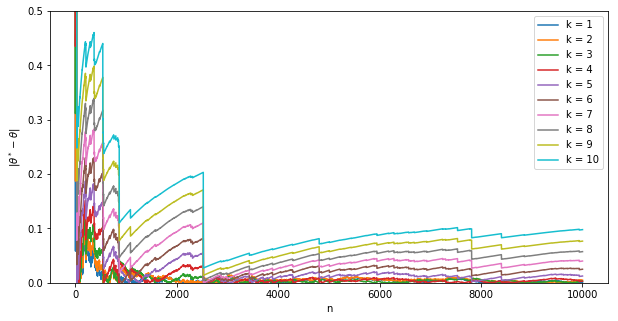

In [39]:
teta = 1
selection = expon(scale=teta).rvs(size = N)# генерирую выборку из экспоненциального распределения
k = np.arange(1, 11, 1)
n = np.linspace(1, N + 1, N)# генерирую диапазон для n
label = []
plt.figure(figsize=(10,5))
for i in k:
    teta = np.power(np.math.factorial(i) / (np.cumsum(np.power(selection, i)) / n), 1 / i)
    label.append("k = " + str(i))
    plt.plot(n, abs(teta - 1))
    plt.xlabel('n')
    plt.ylabel(r'$|\theta^* - \theta|$')
plt.legend(label)
plt.ylim([0, 0.5])
plt.show()

Вывод: видно, что самая лучшая оценка получается, когда к = 1

# Task 3

Придумайте распределение, у которого конечны первые
четыре момента, а пятый -- нет. Сгенерируйте выборку $X_1, ..., X_N$
из этого распре\-деления для $N = 10^4.$ Постройте график плотности,
а также нанесите точки выборки на график (с нулевой
$y$-координатой). Для всех $n\leq N$ посчитайте оценку $s^2 =
s^2(X_1, ..., X_N)$ для дисперсии. Постройте график зависимости
модуля разности оценки дисперсии и ее истинного значения от $n.$
Проведите аналогичное исследование для выборки из распределения
Коши, где вместо графика модуля разности оценки дисперсии и ее
истинного значения (которого не существует) постройте график оценки
дисперсии.

Возьмем известное распределение Парето

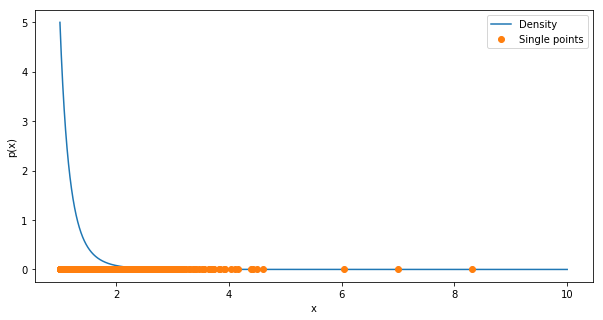

In [40]:
teta = 1
selection = pareto(b = 5).rvs(size=N)# генерирую выборку из распределения Парето
n = np.linspace(1, 10, N)
p = pareto(b = 5).pdf(n)# плотность распределения Парето
plt.figure(figsize=(10,5))
plt.plot(n, p)# строю график зависимости плотности от n 
plt.plot(selection, np.zeros(N), 'o')# а здесь наношу на этот же график точки выборки с нулевой ординатой
plt.xlabel('x')
plt.ylabel('p(x)')
plt.legend(["Density", "Single points"])
plt.show()

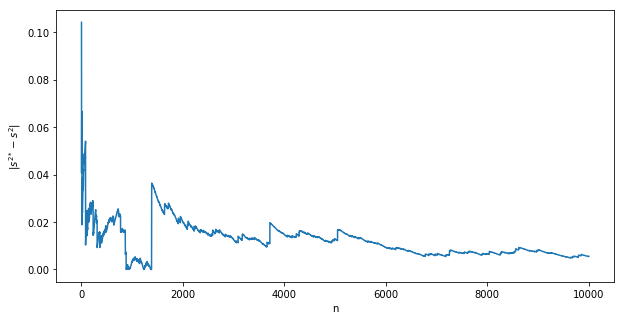

In [41]:
n = np.linspace(1, N + 1, N) # диапазон для n 
# считаю разность оценки дисперсии и ее истинного значения для каждого n
current_D = pareto(b = 5).var()
diff_s = abs(np.cumsum(selection ** 2) / n - (np.cumsum(selection) / n) ** 2 - current_D) 
plt.figure(figsize=(10,5))
plt.plot(n, diff_s)
plt.xlabel('n')
plt.ylabel(r'$|{s}^{2*} - s^2|$')
plt.show()

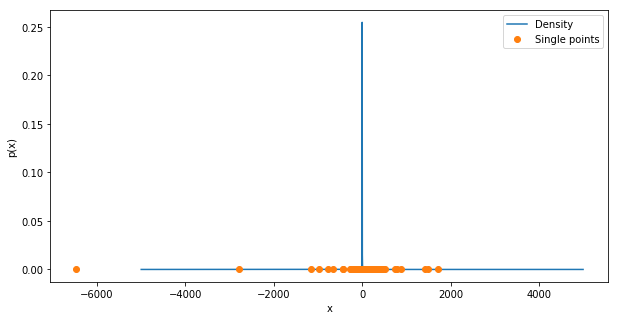

In [42]:
#Аналогичное исследование для распределения Коши
selection = cauchy.rvs(size=N)# генерирую выборку из распределения Коши
x = np.linspace(-N / 2, N / 2, N)
p = cauchy.pdf(x) #плотность распределения Коши
plt.figure(figsize=(10,5))
plt.plot(x, p)
plt.plot(selection, np.zeros(N), 'o')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.legend(["Density", "Single points"])
plt.show()

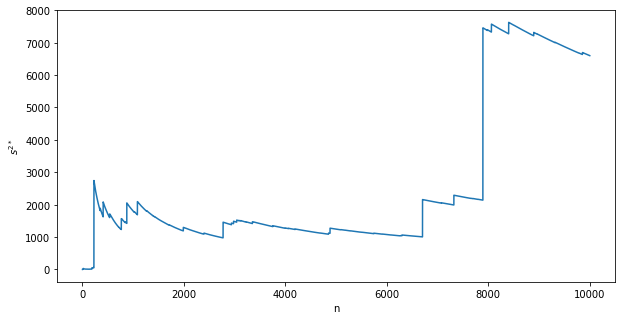

In [43]:
n = np.linspace(1, N + 1, N)# генерирую n из диапазона
s = np.cumsum(selection ** 2) / n - (np.cumsum(selection) / n) ** 2# оценка дисперсии
plt.figure(figsize=(10,5))
plt.plot(n, s)
plt.xlabel('n')
plt.ylabel(r'${s}^{2*}$')
plt.show()

Вывод: видим, что при увеличении размера выборки, наши оценка для дисперсии прибижается к ее истинному значению

# Task 4

Сгенерируйте выборку $X_1, ..., X_N$ из стандартного нормального распределения для
$N = 10^4.$ Для всех $n\leq N$ посчитайте по ней эмпирическую
функцию распределения. Для некоторых $n$ (например, $n \in \{10, 25,
50, 100, 1000, N\}$) постройте графики эмпи\-рической функции
распределения (отметьте на оси абсцисс точки ``скачков'' кривых,
нанеся каждую из ``подвыборок'' на ось абсцисс на каждом
соответствующем графике с коэффициентом прозрачности 0.2), нанеся на
каждый из них истинную функцию распределения (количество графиков
равно количеству различныз значений $n$). Для всех $n \leq N$
посчитайте точное значение $D_n = \sup_{x\in\mathbb{R}}
|\hat{F}_n(x) - F(x)|$ и постройте график зависимости статистик
$D_n$ и $\sqrt{n}D_n$ от $n.$

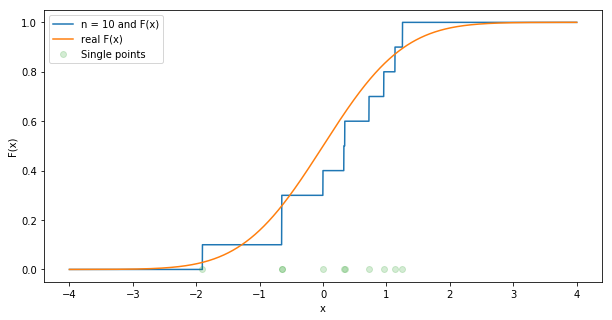

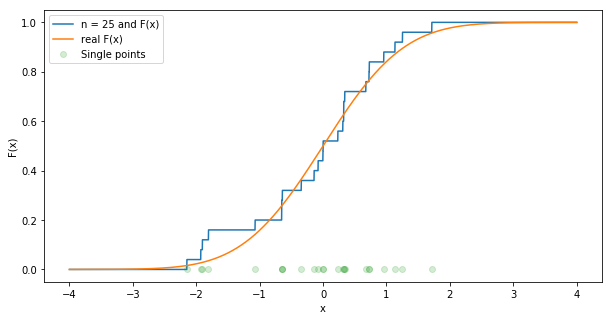

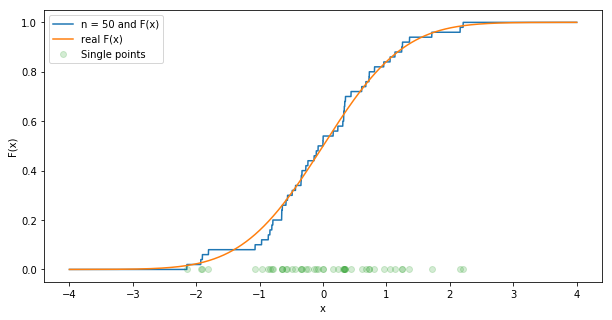

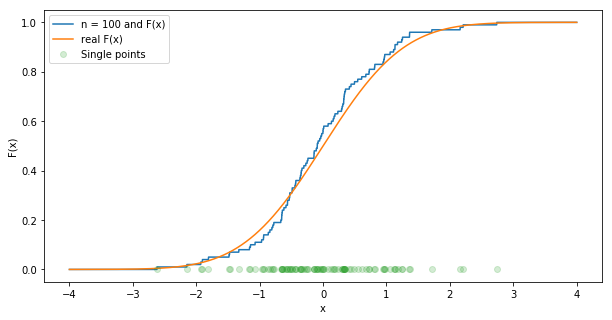

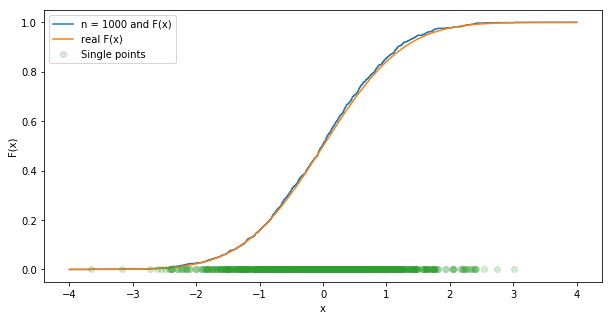

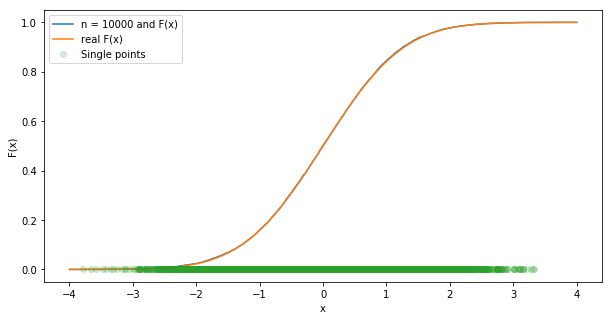

In [44]:
selection = norm.rvs(size = N) # генерирую выбору из стандартного нормального распределения
x = np.linspace(-4, 4, N)
n = np.linspace(1, N + 1, N)
F = np.array(list(map(lambda x: np.cumsum((x - selection) >= 0) / n, x))) #Эмпирическая функция распределения
n = [10, 25, 50, 100, 1000, N] #данные n
for item in n:
    plt.figure(figsize=(10,5))
    plt.plot(x, F[:, item - 1], label = "n = {} and F(x)".format(str(item)))
    plt.plot(x, norm.cdf(x), label="real F(x)")
    plt.plot(selection[:item], np.zeros(item), 'o', label="Single points", alpha=0.2)
    plt.xlabel('x')
    plt.ylabel("F(x)")
    plt.legend()
    plt.show()

In [ ]:
possible_n = np.arange(1, N + 1, 1)
# считаем D
D = -1 * np.array(list(map(lambda n: opt.fmin(lambda current_x: -abs(np.sum((current_x - selection[:n]) >= 0)/n - norm.cdf(current_x)), 0, full_output=True, disp=False)[1], possible_n)))
# считаем D_n
D_n = -1 * np.array(list(map(lambda n: np.sqrt(n) * opt.fmin(lambda x: -abs(np.sum((x - selection[:n]) >= 0)/n - norm.cdf(x)), 0, full_output=True, disp=False)[1], possible_n)))
# строим графики D_n и sqrt(n) * D_n
plt.figure(figsize=(10,5))
plt.plot(possible_n, D)
plt.xlabel('n')
plt.ylabel(r'$D_{n}(x)$')
plt.legend([r'$D_{n}$'])
plt.show()
plt.figure(figsize=(10,5))
plt.plot(possible_n, D_n)
plt.legend([r'$\sqrt{n}\cdot D_n$'])
plt.xlabel('n')
plt.ylabel(r'$\sqrt{n}\cdot D_n(x)$')   
plt.show()

Вывод: при увеличении размера выборки эмперическая функция распределения приближается к ее истинному значению